In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mD_vT_relationships as relationships
import numpy as np
import relationship_plots as plot
from scipy import stats
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 10,
    "legend.fontsize": 10,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [5]:
"""
variables:
    agg_as = aggregate major radius from fit ellipsoid
    agg_bs = aggregate middle radius from fit ellipsoid
    agg_cs = aggregate minor radius from fit ellipsoid
    Aps = area of projected aggregate polygons in x-y plane
    Acs = area of smallest circle fit around projected aggregate in x-y plane
    Vps = volume of aggregate polygons
    Ves = volume of ellipsoid
    Dmaxs = longest axis from vertex to vertex through 3D polygon
"""
# LOAD IPAS DATA
# array shapes = [mono phi, mono r, nclusters, ncrystals]
f = open("../instance_files/mD_vT_vars_rand_1", "rb")
result_rand = pickle.load(f)
f.close()

f = open("../instance_files/mD_vT_vars_flat_1", "rb")
result_flat = pickle.load(f)
f.close()

#LOAD CPI DATA
all_campaigns = ['AIRS_II', 'ARM', 'ATTREX', 'CRYSTAL_FACE_NASA', 'CRYSTAL_FACE_UND', 'ICE_L', 'IPHEX', 'ISDAC', 'MACPEX', 'MC3E', 'MIDCIX', 'MPACE', 'OLYMPEX', 'POSIDON']
#all_campaigns = ['AIRS_II', 'ARM', 'CRYSTAL_FACE_NASA', 'CRYSTAL_FACE_UND', 'ICE_L', 'MIDCIX', 'MPACE', 'OLYMPEX']

campaigns = [] 
classifications = []
ars = []
cnt_area = []
a = []  # larger radius
c = []  # smaller radius
Dmax = []  # max diameter
complexity = []
for campaign in all_campaigns:
    df = pd.read_csv(f'../CPI_verification/{campaign}.csv')
    cnt_area.append(df['cnt_area']*5.29E-12) # [m2]
    ars.append(df['filled_circular_area_ratio'])
    campaign='AIRS II' if campaign == 'AIRS_II' else campaign
    campaign ='CRYSTAL FACE NASA' if campaign == 'CRYSTAL_FACE_NASA' else campaign
    campaign ='CRYSTAL FACE UND' if campaign == 'CRYSTAL_FACE_UND' else campaign
    campaign ='ICE L' if campaign == 'ICE_L' else campaign
     
    campaigns.append([campaign]*len(df['filled_circular_area_ratio']))
    classifications.append(df['classification'])
    complexity.append(df['complexity'])
    
    for height, width in zip(df['particle height']/2, df['particle width']/2):
        a.append(height* 1E-6 if height > width else width* 1E-6)
        c.append(height* 1E-6 if height < width else width* 1E-6)  # [m]
        Dmax.append(height*2* 1E-6 if height > width else width*2* 1E-6)
#flatten list of lists from each campaign
ars = list(np.concatenate(ars).flat)
cnt_area = list(np.concatenate(cnt_area).flat)
campaigns = list(np.concatenate(campaigns).flat)
classifications = list(np.concatenate(classifications).flat)
complexity = list(np.concatenate(complexity).flat)

df_CPI = pd.DataFrame(list(zip(campaigns, classifications, ars, cnt_area, a, c, Dmax, complexity)), columns=['campaign', 'classification', 'area_ratio', 'cnt_area', 'a', 'c', 'Dmax', 'complexity'])
df_CPI = df_CPI[df_CPI['area_ratio'] != -999.0]
df_CPI = df_CPI[df_CPI['a'] != 0.0]
df_CPI = df_CPI[df_CPI['c'] != 0.0]
df_CPI = df_CPI[df_CPI['Dmax'] != 0.0]
df_CPI = df_CPI[df_CPI['complexity'] != 0.0]
df_CPI = df_CPI[df_CPI['complexity'] != -0.0]

d_CPI = df_CPI[df_CPI.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df.dropna(inplace=True)
df_CPI.classification.unique()

array(['compact_irreg', 'budding', 'bullet', 'agg', 'rimed',
       'planar_polycrystal', 'column'], dtype=object)

### Mass calculated using area vs. volume: <br>

## AREA:
<p> first determine if oblate or prolate for each formed agg (out of 300) for all nm (99):<\p><br>
$rho_i = rho_b * Ar$<br>
oblate:<br>
$m = 4/3 * pi * a^2 * c * rho_i$<br>
prolate:<br>
$m = 4/3 * pi * a * c^2 * rho_i$

## VOLUME:
for a given r_m and phi_m:<br>
$rho_i = rho_b*Vr$<br>
no need to find prolate/oblate <br>
$m = 4/3 * pi * a * b * c *rho_i$   [kg] <br>

<p> only finding mode of m after calculating rho_i for each n and nm </p>
<p> converting Aps, Acs, Vps, ,and Ves into [m]</p>
    

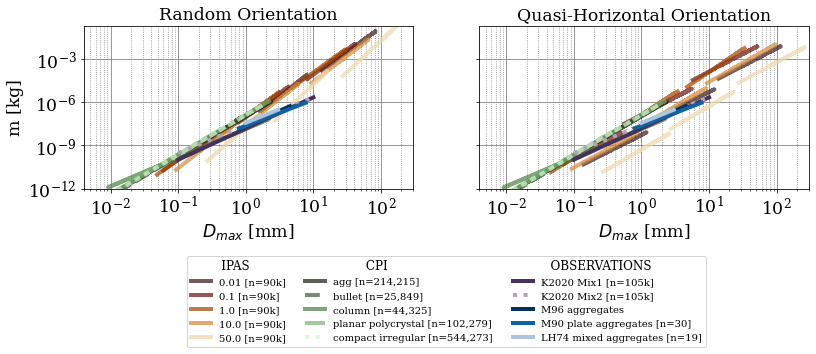

In [9]:
# RANDOM ORIENTATION
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1, 2]
# if using volume ratios for mass:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7), sharey=True, sharex=True)
#else:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,3), sharey=True, sharex=True)

# RANDOM ORIENTATION
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel='m [kg]'
title='Random Orientation'
p.m_D_plot(title, ylabel, mflag = 'area', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel=''
title='Quasi-Horizontal Orientation'
p.m_D_plot(title, ylabel, mflag = 'area', result_rand=False)

# # RANDOM ORIENTATION
# locals().update(result_rand)
# p = plot.Plots(ax3, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel='m [kg]'
# title='\nCalculated Mass using Vr'
# p.m_D_plot(title, ylabel,  mflag = 'vol', result_rand=True)

# # QUASI-HORIZONTAL ORIENTATION
# locals().update(result_flat)
# p = plot.Plots(ax4, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel=''
# title='\nCalculated Mass using Vr'
# p.m_D_plot(title, ylabel, mflag = 'vol', result_rand=False)

#plt.savefig('../plots/m_D_relationship.png', bbox_inches='tight')

USING HEYMSFIELD'S METHOD


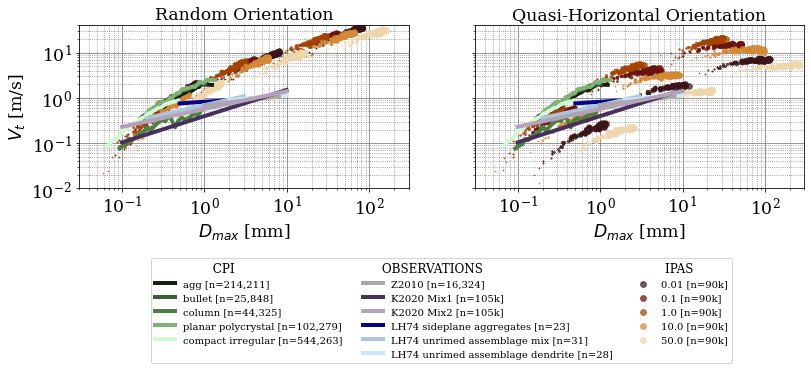

In [8]:
phi_idxs = [0,1,2,3,4]
r_idxs = [0, 1, 2]

# if using volume ratios for mass:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7), sharey=True, sharex=True)
#else:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,3), sharey=True, sharex=True)

#which method of equations to follow:
study = 'Heymsfield'

# RANDOM ORIENTATION
locals().update(result_rand)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = "$V_t$ [m/s]"
title='Random Orientation'
p.vt_plot(title, ylabel, mflag = 'area', study=study, result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation"
ylabel = " "
p.vt_plot(title, ylabel, mflag = 'area',  study=study, result_rand=False)

# # RANDOM ORIENTATION
# locals().update(result_rand)
# p = plot.Plots(ax3, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel = "$V_t$ [m/s]"
# title='\nCalculated Mass using Vr'
# p.vt_plot(title, ylabel,  mflag = 'vol', study=study, result_rand=True)

# # QUASI-HORIZONTAL ORIENTATION
# locals().update(result_flat)
# p = plot.Plots(ax4, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel = " "
# title='\nCalculated Mass using Vr'
# p.vt_plot(title, ylabel, mflag = 'vol',  study=study, result_rand=False)


if study == 'Mitchell':
    print("USING MITCHELL'S METHOD")
elif study == 'Heymsfield':
    print("USING HEYMSFIELD'S METHOD")
elif study =='Heymsfield2002':
    print("USING HEYMSFIELD'S 2002 METHOD")

#plt.savefig(f'../plots/vt_{study}.png', bbox_inches='tight')

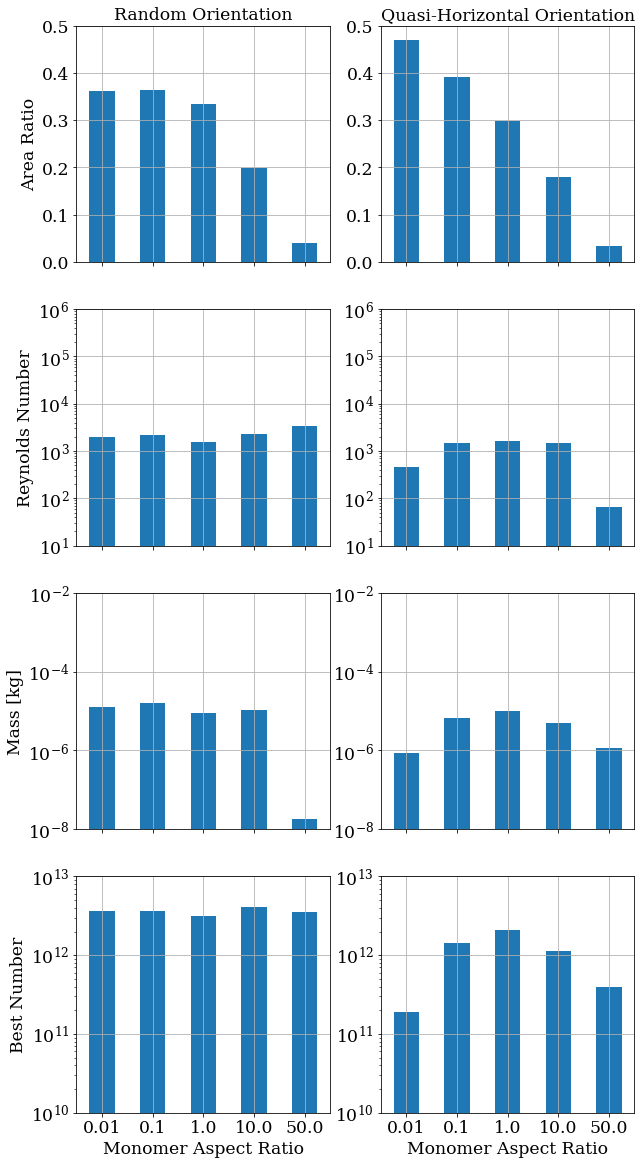

In [6]:
phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0,1,2]
r_idx = 1
fig,axs = plt.subplots(4, 2, figsize=(10, 20), sharex=True)
axs = axs.ravel()

locals().update(result_rand)
p = plot.Plots(axs[0], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
title = f"Random Orientation"
# xlabel = "Monomer Aspect Ratio"
xlabel = ""
p.area_ratio_plot(title, xlabel, result_rand=True)

# QH ORIENTATION
# convert dict keys to variables
locals().update(result_flat)
p = plot.Plots(axs[1], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation"
p.r_idx = r_idx  # index of monomer radius
xlabel = ""
p.area_ratio_plot(title, xlabel, result_rand=False)
#ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

locals().update(result_rand)
p = plot.Plots(axs[2], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
# title = f"Random Orientation\n {nm+1} monomers"
title = ""
xlabel = "Monomer Aspect Ratio"
p.Re_plot(title, xlabel, result_rand=True)

locals().update(result_flat)
# title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title = ""
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(axs[3], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.Re_plot(title, xlabel, result_rand=False)
# ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

locals().update(result_rand)
p = plot.Plots(axs[4], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
title = f" "
# xlabel = "Monomer Aspect Ratio"
xlabel = ""
p.mass_plot(title, xlabel, result_rand=True)

# QH ORIENTATION
# convert dict keys to variables
locals().update(result_flat)
p = plot.Plots(axs[5], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f" "
p.r_idx = r_idx  # index of monomer radius
xlabel = ""
p.mass_plot(title, xlabel, result_rand=False)
#ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

locals().update(result_rand)
p = plot.Plots(axs[6], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
# title = f"Random Orientation\n {nm+1} monomers"
title = ""
xlabel = ""
p.best_number_plot(title, xlabel, result_rand=True)

locals().update(result_flat)
# title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title = ""
xlabel = ""
p = plot.Plots(axs[7], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.best_number_plot(title, xlabel, result_rand=False)
# ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.savefig(f'../plots/vt_vars_phi_orientation.png', bbox_inches='tight')

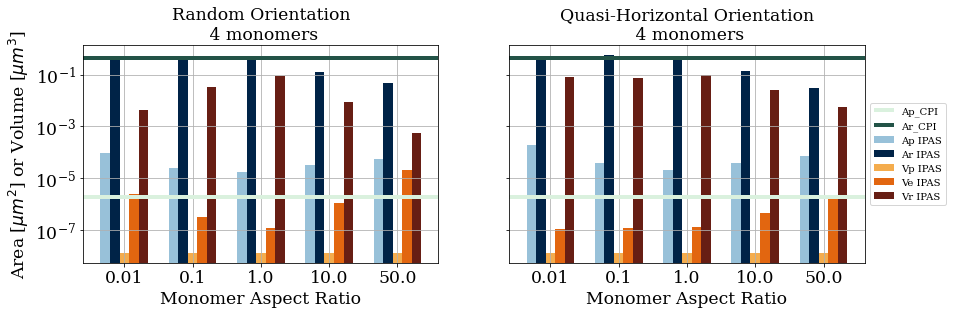

In [182]:
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
nm = 3  # plot after how many monomers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 2  # index of monomer radius
p.nm = nm  # plot after how many monomers
title = f"Random Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p.area_plot(title, xlabel, nm)

locals().update(result_flat)
title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 2  # index of monomer radius
p.nm = nm  # plot after how many monomers
p.area_plot(title, xlabel, nm)
ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5));

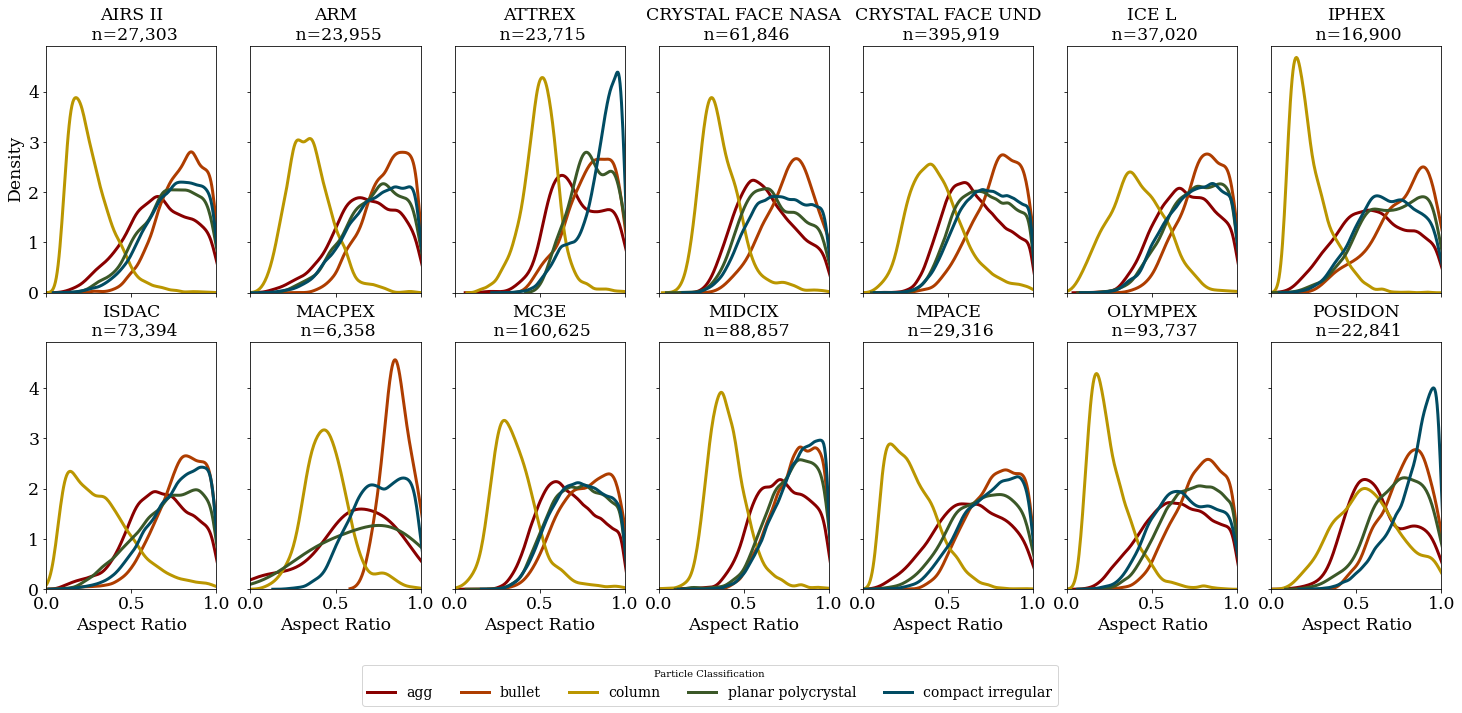

In [4]:
colors_cpi = ["#890000", "#ae3d00", "#ba9600", "#3b5828", "#014c63"]
particle_types = [
    "agg",
    "bullet",
    "column",
    "planar_polycrystal",
    "compact_irreg",
]
fig, axs = plt.subplots(2, 7, figsize=(25,10), sharex=True, sharey=True)
axs = axs.ravel()

for c, campaign in enumerate(df_CPI["campaign"].unique()):
    df_CPI["Aspect Ratio"] = df_CPI["c"] / df_CPI["a"]
    df = df_CPI[df_CPI["campaign"] == campaign]
    for i, part_type in enumerate(particle_types):
        df_type = df["Aspect Ratio"][df["classification"] == part_type]
        part_type = "compact irregular" if part_type == "compact_irreg" else part_type
        part_type = "planar polycrystal" if part_type == "planar_polycrystal" else part_type

        sns.kdeplot(df_type, color=colors_cpi[i], label=part_type, ax=axs[c], linewidth = 3)
        no_ylab = [1,2,3,5,6,7]
        axs[c].set_ylabel(' ' if c in no_ylab else 'Density')
        axs[c].set_title(f"{campaign}\n n={len(df):,}")
        axs[c].yaxis.set_major_locator(MaxNLocator(integer=True))
        axs[c].set_xlim(0.0, 1.0);
y = -.5
x=-3.3
axs[c].legend(
    bbox_to_anchor=(x, y),
    loc="lower center",
    ncol=5,
    title="Particle Classification",
    fontsize=14
) 
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.savefig(f'../plots/campaign_aspect_ratios.png', bbox_inches='tight')

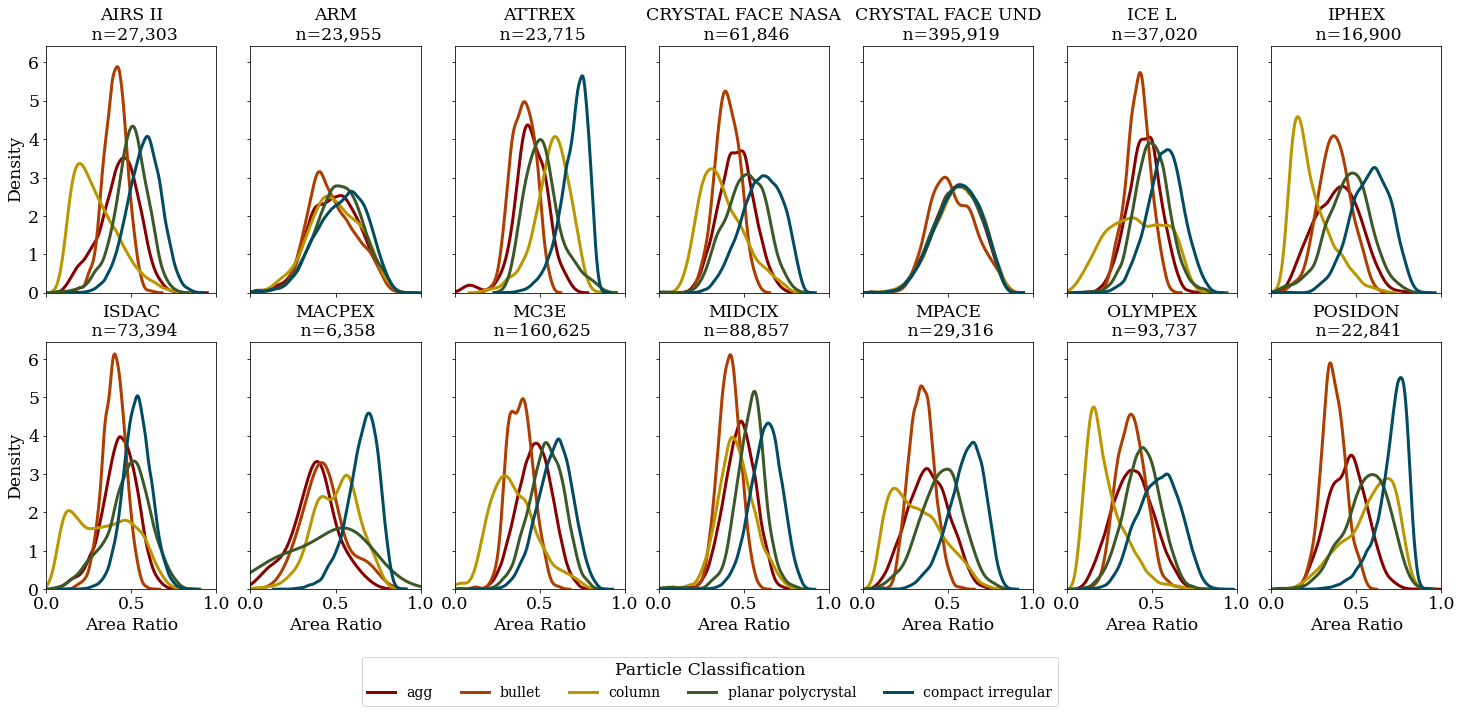

In [5]:
colors_cpi = ["#890000", "#ae3d00", "#ba9600", "#3b5828", "#014c63"]
particle_types = [
    "agg",
    "bullet",
    "column",
    "planar_polycrystal",
    "compact_irreg",
]
fig, axs = plt.subplots(2, 7, figsize=(25,10), sharex=True, sharey=True)
axs = axs.ravel()

for c, campaign in enumerate(df_CPI["campaign"].unique()):
    df = df_CPI[df_CPI["campaign"] == campaign]
    df = df.rename(columns={"area_ratio": "Area Ratio"})
    for i, part_type in enumerate(particle_types):
        df_type = df["Area Ratio"][df["classification"] == part_type]
        part_type = "compact irregular" if part_type == "compact_irreg" else part_type
        part_type = "planar polycrystal" if part_type == "planar_polycrystal" else part_type

        sns.kdeplot(df_type, color=colors_cpi[i], label=part_type, ax=axs[c], linewidth = 3)

        axs[c].set_title(f"{campaign}\n n={len(df):,}")
        
        axs[c].set_xlim(0.0, 1.0);
y = -.5
x=-3.3
axs[c].legend(
    bbox_to_anchor=(x, y),
    loc="lower center",
    ncol=5,
    title="Particle Classification",
    fontsize=14
) 
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.savefig(f'../plots/campaign_area_ratios.png', bbox_inches='tight')

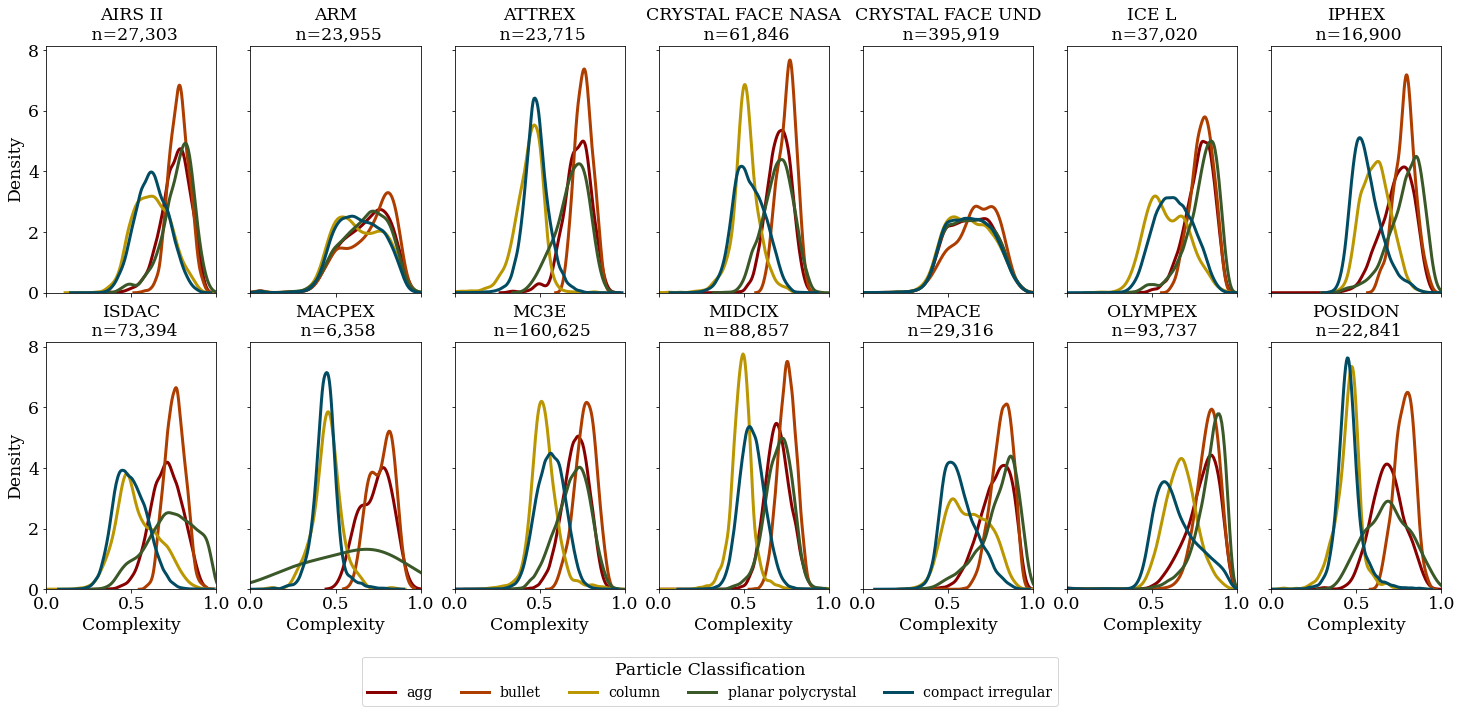

In [6]:
colors_cpi = ["#890000", "#ae3d00", "#ba9600", "#3b5828", "#014c63"]
particle_types = [
    "agg",
    "bullet",
    "column",
    "planar_polycrystal",
    "compact_irreg",
]
fig, axs = plt.subplots(2, 7, figsize=(25,10), sharex=True, sharey=True)
axs = axs.ravel()

for c, campaign in enumerate(df_CPI["campaign"].unique()):
    df = df_CPI[df_CPI["campaign"] == campaign]
    df = df.rename(columns={"complexity": "Complexity"})
    for i, part_type in enumerate(particle_types):
        df_type = df["Complexity"][df["classification"] == part_type]
        part_type = "compact irregular" if part_type == "compact_irreg" else part_type
        part_type = "planar polycrystal" if part_type == "planar_polycrystal" else part_type

        sns.kdeplot(df_type, color=colors_cpi[i], label=part_type, ax=axs[c], linewidth = 3)

        axs[c].set_title(f"{campaign}\n n={len(df):,}")
        
        axs[c].set_xlim(0.0, 1.0);
y = -.5
x=-3.3
axs[c].legend(
    bbox_to_anchor=(x, y),
    loc="lower center",
    ncol=5,
    title="Particle Classification",
    fontsize=14
) 
plt.rcParams['legend.title_fontsize'] = 'xx-large'
plt.savefig(f'../plots/campaign_complexity.png', bbox_inches='tight')

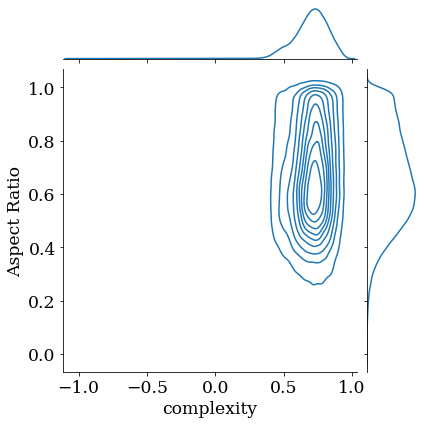

In [4]:
df = df_CPI[df_CPI["classification"] == 'agg']
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

df['Aspect Ratio'] = df['c']/df['a']
sns.jointplot(data = df, x = "complexity", y = "Aspect Ratio", kind='kde')

In [28]:
def get_modes(var):
    """
    find the mode of a variale from a histogram bin with the highest frequency
    """
    hist, bin_edges = np.histogram(var, bins=30)
    mode_index = hist.argmax()
    #plt.hist(var, bins=30)
    #plt.show()
    return bin_edges[mode_index]

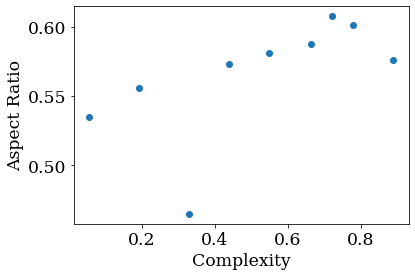

In [55]:
df = df_CPI[df_CPI["classification"] == 'agg']
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df['ar'] = df['c']/df['a']
df["binned"] = pd.cut(df['complexity'], bins=np.linspace(0.0, 1.0, 10))
#df["binned"] = pd.qcut(df['complexity'], 15)


plt.ylabel('Aspect Ratio');
plt.xlabel('Complexity');
plt.savefig(f'../plots/complexity_aspectratio.png', bbox_inches='tight')
#each complexity bin count varies between 66 and 52,455

214211


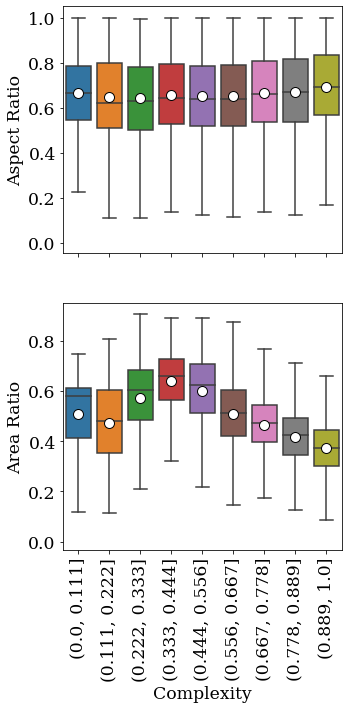

In [78]:
#AGGS
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,10), sharex=True)


df = df_CPI[df_CPI["classification"] == 'agg']
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df['ar'] = df['c']/df['a']
df["binned"] = pd.cut(df['complexity'], bins=np.linspace(0.0, 1.0, 10))
print(len(df))
#df["binned"] = pd.qcut(df['complexity'], 15)

ax = sns.boxplot(x='binned', y='ar', data=df, fliersize=0, showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax1)

groups = df.groupby(df["binned"])
#print(groups.count())
# complexity_modes = groups['complexity'].agg(get_modes)
# ar_modes = groups.ar.agg(get_modes)
#ax.scatter(complexity_modes, ar_modes, 'k')

plt.xticks(rotation=90)
ax1.set_ylabel('Aspect Ratio');
ax1.set_xlabel('');


df = df_CPI[df_CPI["classification"] == 'agg']
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df["binned"] = pd.cut(df['complexity'], bins=np.linspace(0.0, 1.0, 10))
#df["binned"] = pd.qcut(df['complexity'], 15)

ax = sns.boxplot(x='binned', y='area_ratio', data=df, fliersize=0, showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax2)

groups = df.groupby(df["binned"])
#print(groups.count())
# complexity_modes = groups['complexity'].agg(get_modes)
# ar_modes = groups.ar.agg(get_modes)
#ax.scatter(complexity_modes, ar_modes, 'k')

plt.xticks(rotation=90)
plt.ylabel('Area Ratio');
plt.xlabel('Complexity');
plt.savefig(f'../plots/complexity_phi_ar.png', bbox_inches='tight')
#each complexity bin count varies between 138 and 80758

544263


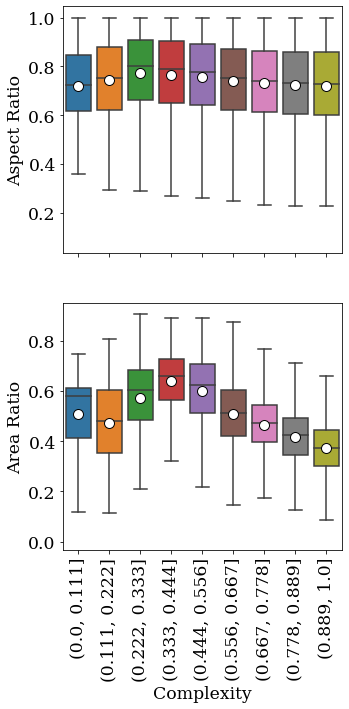

In [79]:
#COMPACT IRREGS
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,10), sharex=True)


df = df_CPI[df_CPI["classification"] == 'compact_irreg']
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df['ar'] = df['c']/df['a']
df["binned"] = pd.cut(df['complexity'], bins=np.linspace(0.0, 1.0, 10))
print(len(df))
#df["binned"] = pd.qcut(df['complexity'], 15)

ax = sns.boxplot(x='binned', y='ar', data=df, fliersize=0, showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax1)

groups = df.groupby(df["binned"])
#print(groups.count())
# complexity_modes = groups['complexity'].agg(get_modes)
# ar_modes = groups.ar.agg(get_modes)
#ax.scatter(complexity_modes, ar_modes, 'k')

plt.xticks(rotation=90)
ax1.set_ylabel('Aspect Ratio');
ax1.set_xlabel('');


df = df_CPI[df_CPI["classification"] == 'agg']
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df["binned"] = pd.cut(df['complexity'], bins=np.linspace(0.0, 1.0, 10))
#df["binned"] = pd.qcut(df['complexity'], 15)

ax = sns.boxplot(x='binned', y='area_ratio', data=df, fliersize=0, showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax2)

groups = df.groupby(df["binned"])
#print(groups.count())
# complexity_modes = groups['complexity'].agg(get_modes)
# ar_modes = groups.ar.agg(get_modes)
#ax.scatter(complexity_modes, ar_modes, 'k')

plt.xticks(rotation=90)
plt.ylabel('Area Ratio');
plt.xlabel('Complexity');
#plt.savefig(f'../plots/complexity_phi_ar.png', bbox_inches='tight')
#each complexity bin count varies between 138 and 80758